In [19]:
import pandas as pd

df = pd.read_csv("../Sales Performance Analysis/sales_data_v2.csv")

df.head()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    14 non-null     int64 
 1   OrderDate  14 non-null     object
 2   Product    14 non-null     object
 3   Category   14 non-null     object
 4   Quantity   14 non-null     int64 
 5   Price      14 non-null     int64 
 6   Country    14 non-null     object
dtypes: int64(3), object(4)
memory usage: 916.0+ bytes


,OrderID,OrderDate,Product,Category,Quantity,Price,Country
0,1001,2024-01-05,Laptop,Electronics,2,900,Egypt
1,1002,2024-01-06,Headphones,Electronics,5,50,Egypt
2,1003,2024-01-07,Coffee Machine,Home Appliances,1,300,UAE
3,1004,2024-01-10,Smartphone,Electronics,3,700,Saudi Arabia
4,1005,2024-01-12,Desk Chair,Furniture,4,120,Egypt
5,1006,2024-01-15,Tablet,Electronics,2,400,Egypt
6,1007,2024-01-20,Office Desk,Furniture,1,350,UAE
7,1008,2024-02-01,Laptop,Electronics,1,900,UAE
8,1009,2024-02-03,Desk Chair,Furniture,2,120,Saudi Arabia
9,1010,2024-02-05,Smartphone,Electronics,1,700,Egypt


# Convert OrderDate to a real date
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

In [20]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])

In [21]:
# Creating A New Column Revenue
df["Revenue"] = df["Quantity"] * df["Price"]

df.head()
df.dtypes


OrderID               int64
OrderDate    datetime64[ns]
Product              object
Category             object
Quantity              int64
Price                 int64
Country              object
Revenue               int64
dtype: object

In [22]:
# What is The Total Revenue
total_revenue = df["Revenue"].sum()
print("Total_reveue : " , total_revenue)

Total_reveue :  9770


In [23]:
# Which Product generated the most Revenue
reveune_by_product = df.groupby("Product")["Revenue"].sum()
print(reveune_by_product)

Product
Coffee Machine     900
Desk Chair         720
Headphones         400
Laptop            2700
Office Desk       1050
Smartphone        2800
Tablet            1200
Name: Revenue, dtype: int64


In [24]:
# Which Category generated the most Category
reveune_by_category = df.groupby("Category")["Revenue"].sum()
print(reveune_by_category)

Category
Electronics        7100
Furniture          1770
Home Appliances     900
Name: Revenue, dtype: int64


In [25]:
# Analyze Monthly Revenue
df["Month"] = df["OrderDate"].dt.to_period("M")

# Revenue by month
monthly_revenue = df.groupby("Month")["Revenue"].sum()
print(monthly_revenue)

Month
2024-01    6080
2024-02    3690
Freq: M, Name: Revenue, dtype: int64


# Visual Insights

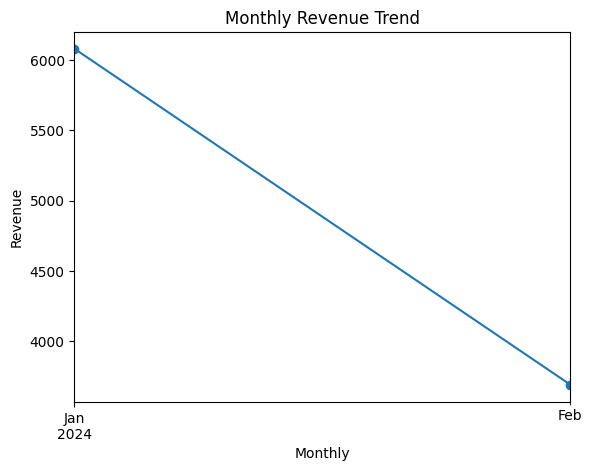

In [26]:
import matplotlib.pyplot as plt

monthly_revenue.plot(kind="line" , marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Monthly")
plt.ylabel("Revenue")
plt.show()

# Country-Level Performance Analysis

In [27]:
# Analyze Revenue by Country
revenue_by_country = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
revenue_by_country

Country
Egypt           5330
Saudi Arabia    2740
UAE             1700
Name: Revenue, dtype: int64

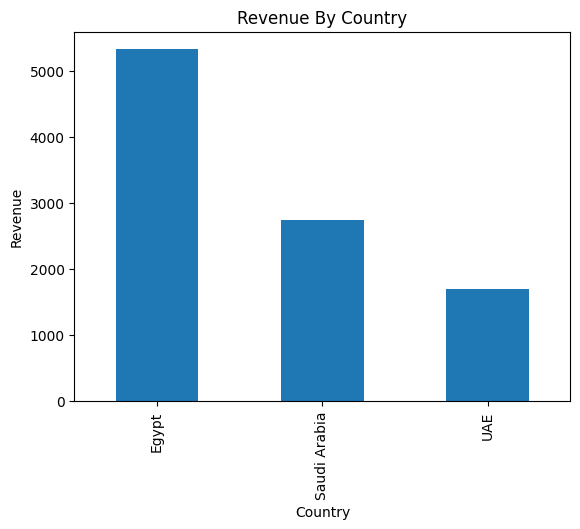

In [28]:
# Bar Chart
revenue_by_country.plot(kind="bar")
plt.title("Revenue By Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()

# Precentage Contribution

In [34]:
df["Revenue"] = df["Quantity"] * df["Price"]

total_revenue = df["Revenue"].sum()

product_share = (df.groupby("Product")["Revenue"].sum() / total_revenue * 100 ).sort_values(ascending=False)

product_share

Product
Smartphone        28.659161
Laptop            27.635619
Tablet            12.282497
Office Desk       10.747185
Coffee Machine     9.211873
Desk Chair         7.369498
Headphones         4.094166
Name: Revenue, dtype: float64

# Visualization 

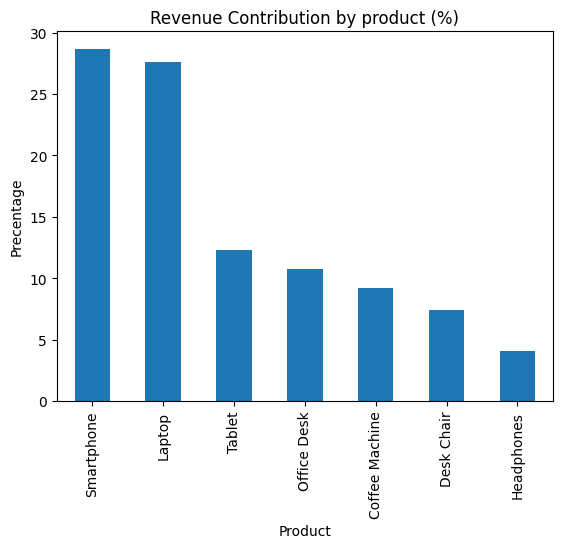

In [35]:
product_share.plot(kind="bar")

plt.title("Revenue Contribution by product (%)")
plt.ylabel("Precentage")
plt.show()